# In Class Exercise - Data Analysis on SL Government Data Set

Data Set:  Household expenditure (Rs. average monthly) on Food and drink, Non-food and Food ratio by Province and District - 2013


In [73]:
Household <- read.csv(file="Household.csv", header=TRUE, sep=",")
head(Household)

ProvinceAndDistrict,Total,FoodAndDrink,NonFood,FoodRatio
Sri Lanka,41444,16356,25088,39.5
Western,58298,18796,39503,32.2
Colombo,63030,19967,43064,31.7
Gampaha,57064,18323,38741,32.1
Kalutara,51906,17535,34371,33.8
Central,38989,16322,22667,41.9


 We will try to see whether there is any relationship between **Total** expenditure and  **FoodRatio** on expenditure

 ## Data Visualization before Analysis

In [74]:
nrow(Household)
Household$ProvinceAndDistrict

[1] 35

[1] Sri Lanka       Western         Colombo        Gampaha        Kalutara    
 [6]  Central         Kandy          Matale         Nuwara Eliya  Southern     
[11]   Galle          Matara         Hambantota    Northern        Jaffna      
[16]   Mannar         Vavuniya       Mullaitivu     Kilinochchi   Eastern      
[21]   Batticaloa     Ampara         Trincomalee   North-western   Kurunegala  
[26]   Puttalam      North-central   Anuradhapura   Polonnaruwa   Uva          
[31]   Badulla        Moneragala    Sabaragamuwa    Ratnapura      Kegalle     
35 Levels:   Ampara   Anuradhapura   Badulla   Batticaloa   Colombo ... Sri Lanka

We will use only districts for the analysis. So we will remove all the other rows

In [75]:
nonDistricts <- c("Sri Lanka", " Western", " Central", " Southern", " Northern", " Eastern", " North-western", " North-central", " Uva", " Sabaragamuwa")

HouseholdModified <- Household[which(!Household$ProvinceAndDistrict %in% nonDistricts),]

HouseholdModified

nrow(HouseholdModified)

,ProvinceAndDistrict,Total,FoodAndDrink,NonFood,FoodRatio
3,Colombo,63030,19967,43064,31.7
4,Gampaha,57064,18323,38741,32.1
5,Kalutara,51906,17535,34371,33.8
7,Kandy,41442,16105,25337,38.9
8,Matale,39222,15781,23441,40.2
9,Nuwara Eliya,33882,17167,16715,50.7
11,Galle,34879,15057,19822,43.2
12,Matara,37639,14670,22969,39.0
13,Hambantota,37573,15228,22345,40.5
15,Jaffna,35405,17709,17695,50.0


[1] 25

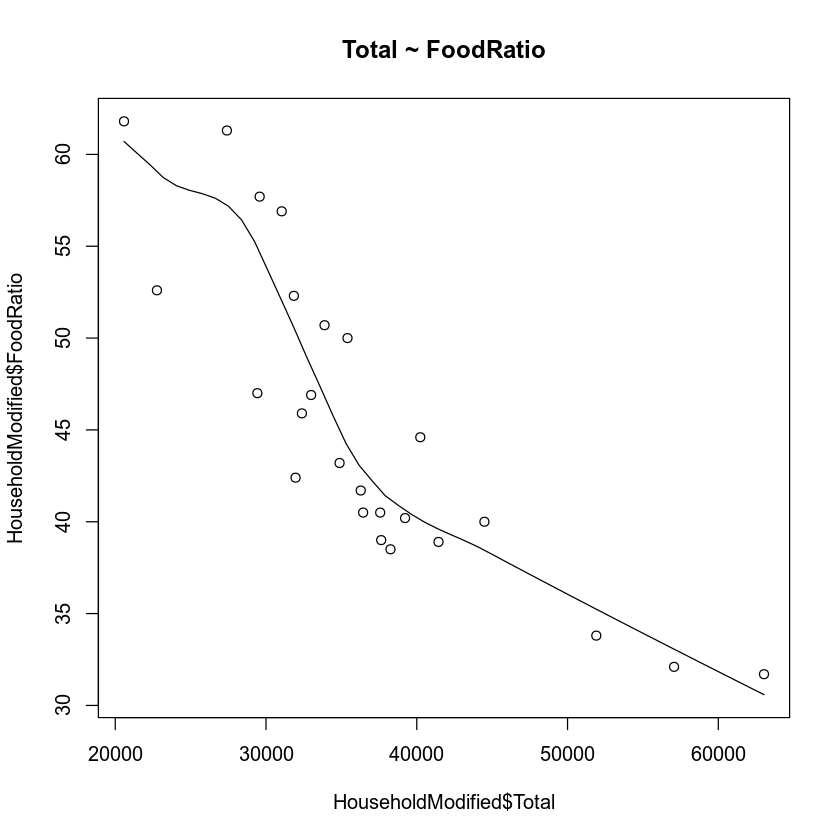

In [76]:
par(mfrow=c(1, 1))
scatter.smooth(x=HouseholdModified$Total, y=HouseholdModified$FoodRatio, main="Total ~ FoodRatio")

## Data Pre Processing

The scatter plot along with the smoothing line above suggests a linear and negative relationship between the *Total* and *FoodRatio*.

Next we will try to see whether there any outliers by generating box plots

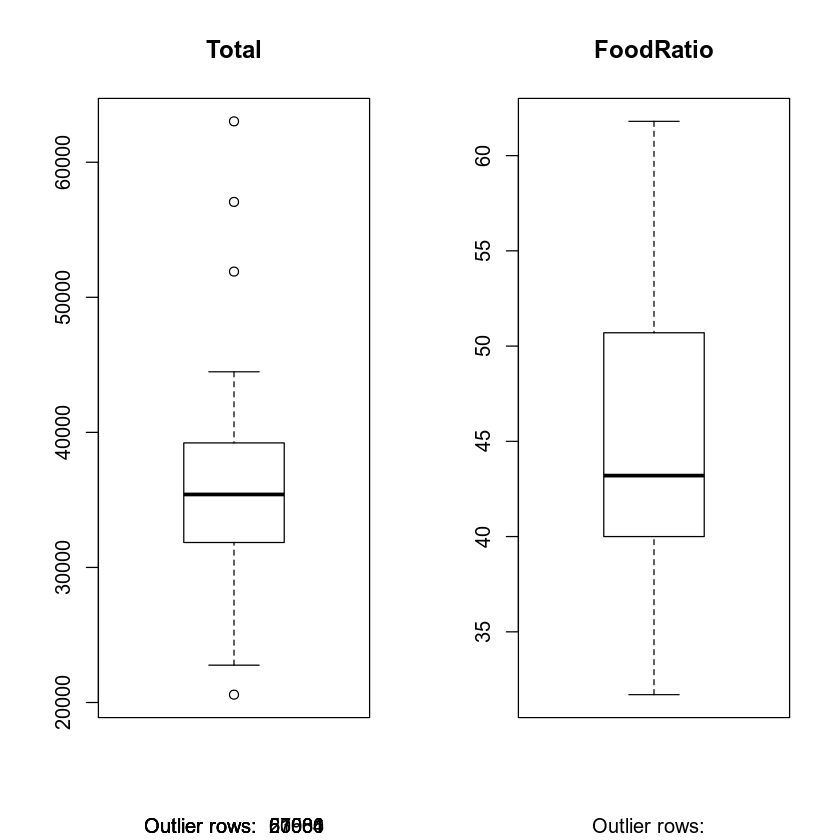

In [77]:
par(mfrow=c(1, 2))  # divide graph area in 2 columns

boxplot(HouseholdModified$Total, main="Total", sub=paste("Outlier rows: ", boxplot.stats(HouseholdModified$Total)$out))

boxplot(HouseholdModified$FoodRatio, main="FoodRatio", sub=paste("Outlier rows: ", boxplot.stats(HouseholdModified$FoodRatio)$out)) 

FoodRatio column doesn't have any outliers. But 'Total' column does contain some outliers. We may need to treat them.
Before that we will see the distribution on the two variables

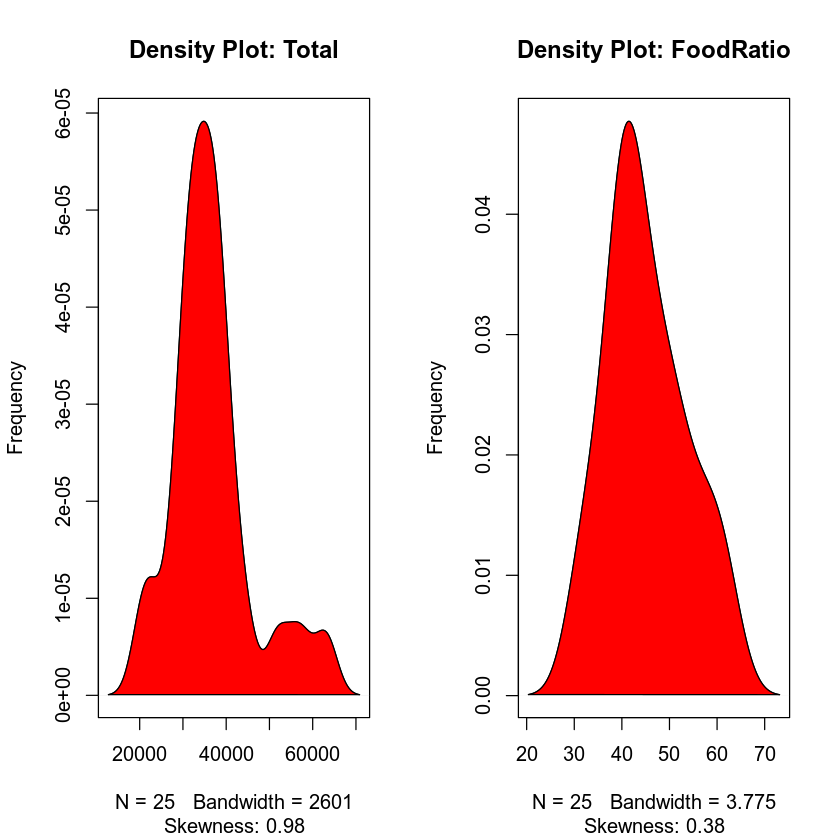

In [78]:
library(e1071)  # for skewness function
par(mfrow=c(1, 2)) 

plot(density(HouseholdModified$Total), main="Density Plot: Total", ylab="Frequency", sub=paste("Skewness:", round(e1071::skewness(HouseholdModified$Total), 2))) 

polygon(density(HouseholdModified$Total), col="red")

plot(density(HouseholdModified$FoodRatio), main="Density Plot: FoodRatio", ylab="Frequency", sub=paste("Skewness:", round(e1071::skewness(HouseholdModified$FoodRatio), 2))) 

polygon(density(HouseholdModified$FoodRatio), col="red")

Now we will treat the outliers

In [79]:
outliers <- boxplot(HouseholdModified$Total, plot=FALSE)$out

HouseholdModified[which(HouseholdModified$Total %in% outliers),]

,ProvinceAndDistrict,Total,FoodAndDrink,NonFood,FoodRatio
3,Colombo,63030,19967,43064,31.7
4,Gampaha,57064,18323,38741,32.1
5,Kalutara,51906,17535,34371,33.8
18,Mullaitivu,20581,12712,7870,61.8


As we found Colombo Gampaha and Kaluthara are outliers for the *Total* column. All those 3 districts are in Western province and those 3 districts are the highest in *Total* Expenditure among 25 districts

Also Milathive districe found to be an outlier, which is the lowest in *Total* Expenditure among 25 districts

So we will remove those outliers from the data set

In [80]:
HouseholdModified <- HouseholdModified[which(!HouseholdModified$Total %in% outliers),]

HouseholdModified

nrow(HouseholdModified)

,ProvinceAndDistrict,Total,FoodAndDrink,NonFood,FoodRatio
7,Kandy,41442,16105,25337,38.9
8,Matale,39222,15781,23441,40.2
9,Nuwara Eliya,33882,17167,16715,50.7
11,Galle,34879,15057,19822,43.2
12,Matara,37639,14670,22969,39.0
13,Hambantota,37573,15228,22345,40.5
15,Jaffna,35405,17709,17695,50.0
16,Mannar,27406,16797,10609,61.3
17,Vavuniya,44486,17805,26681,40.0
19,Kilinochchi,32992,15458,17534,46.9


[1] 21

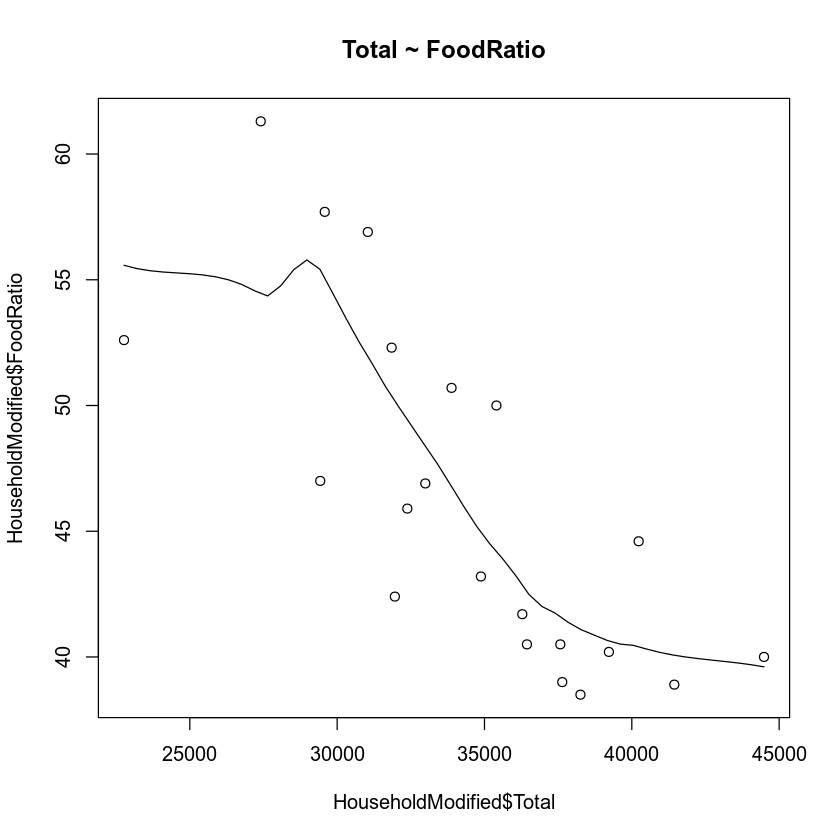

In [81]:
par(mfrow=c(1, 1))
scatter.smooth(x=HouseholdModified$Total, y=HouseholdModified$FoodRatio, main="Total ~ FoodRatio")

Above graph is still not smooth. Therefore we can assume that there are still outliers in the data set. We will test for outliers again

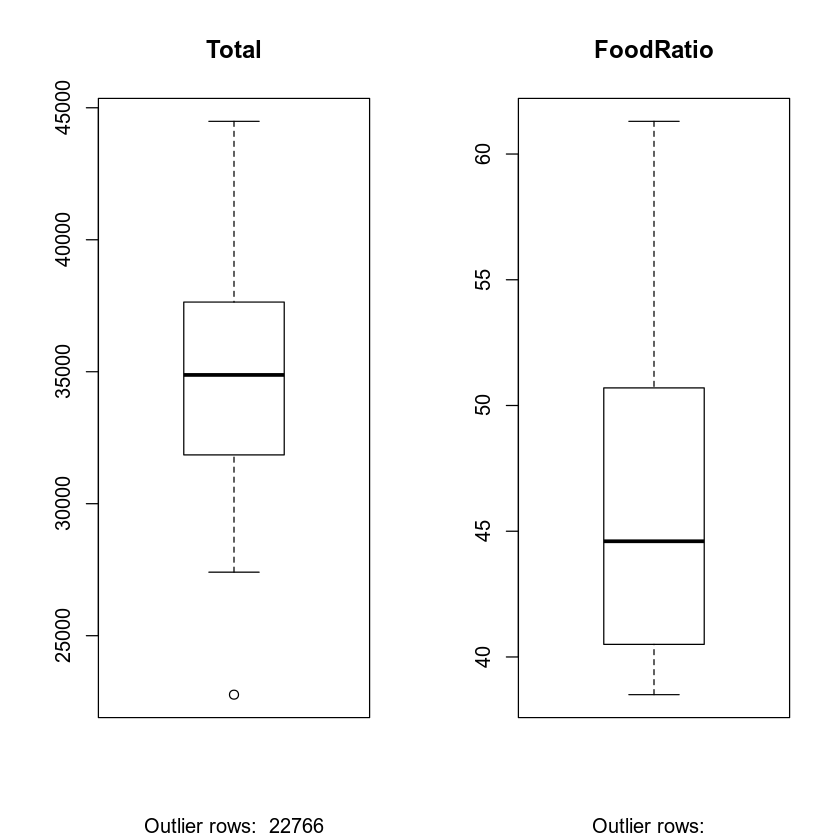

In [82]:
par(mfrow=c(1, 2))  # divide graph area in 2 columns

boxplot(HouseholdModified$Total, main="Total", sub=paste("Outlier rows: ", boxplot.stats(HouseholdModified$Total)$out))

boxplot(HouseholdModified$FoodRatio, main="FoodRatio", sub=paste("Outlier rows: ", boxplot.stats(HouseholdModified$FoodRatio)$out)) 

Still there are outliers

In [83]:
outliers <- boxplot(HouseholdModified$Total, plot=FALSE)$out

HouseholdModified[which(HouseholdModified$Total %in% outliers),]

,ProvinceAndDistrict,Total,FoodAndDrink,NonFood,FoodRatio
32,Moneragala,22766,11985,10781,52.6


According to the finding, Moneragala district is an outlier for the model. We will remove Moneragala district from the data set

In [84]:
HouseholdModified <- HouseholdModified[which(!HouseholdModified$Total %in% outliers),]

HouseholdModified

nrow(HouseholdModified)

,ProvinceAndDistrict,Total,FoodAndDrink,NonFood,FoodRatio
7,Kandy,41442,16105,25337,38.9
8,Matale,39222,15781,23441,40.2
9,Nuwara Eliya,33882,17167,16715,50.7
11,Galle,34879,15057,19822,43.2
12,Matara,37639,14670,22969,39.0
13,Hambantota,37573,15228,22345,40.5
15,Jaffna,35405,17709,17695,50.0
16,Mannar,27406,16797,10609,61.3
17,Vavuniya,44486,17805,26681,40.0
19,Kilinochchi,32992,15458,17534,46.9


[1] 20

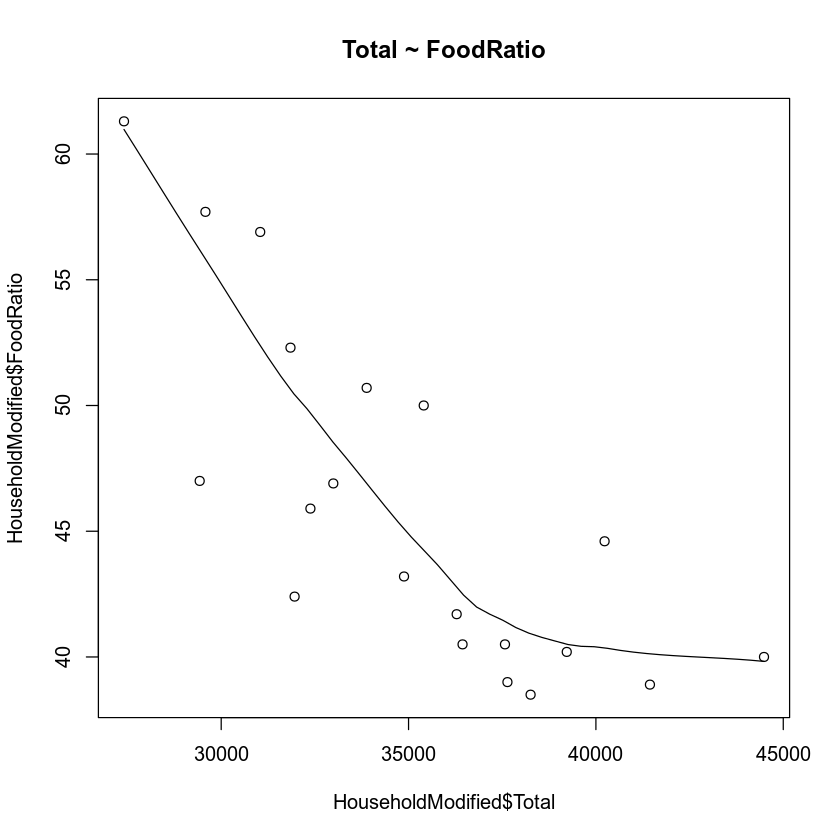

In [85]:
par(mfrow=c(1, 1))
scatter.smooth(x=HouseholdModified$Total, y=HouseholdModified$FoodRatio, main="Total ~ FoodRatio")

the above graph shows a smooth line, so we can assume there are no outliers in the data set. But we will test for outliers again for one last time

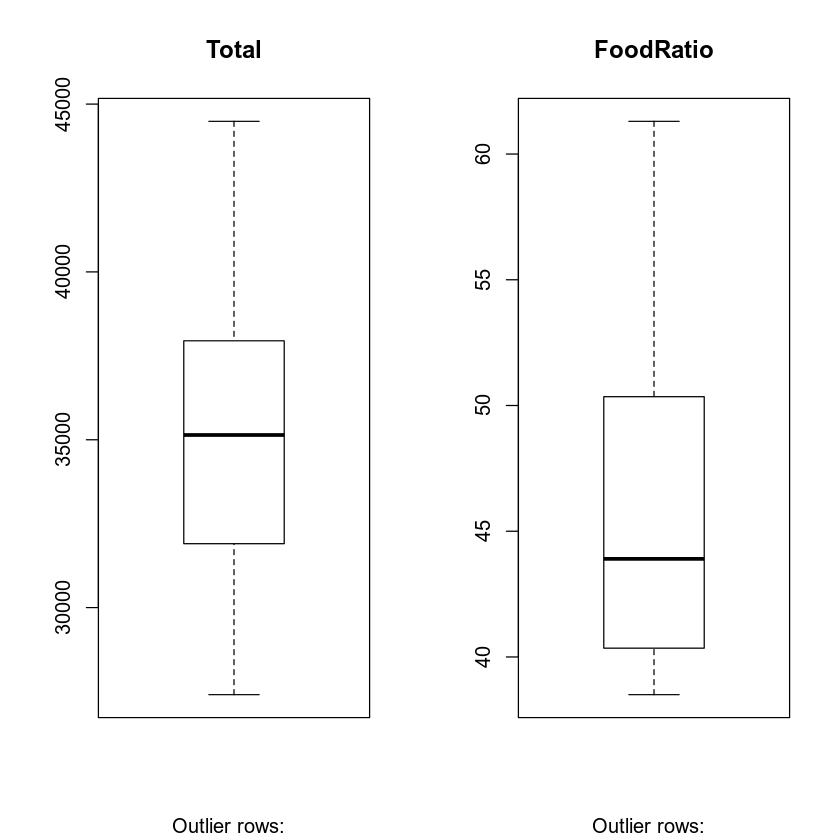

In [86]:
par(mfrow=c(1, 2))  # divide graph area in 2 columns

boxplot(HouseholdModified$Total, main="Total", sub=paste("Outlier rows: ", boxplot.stats(HouseholdModified$Total)$out))

boxplot(HouseholdModified$FoodRatio, main="FoodRatio", sub=paste("Outlier rows: ", boxplot.stats(HouseholdModified$FoodRatio)$out)) 

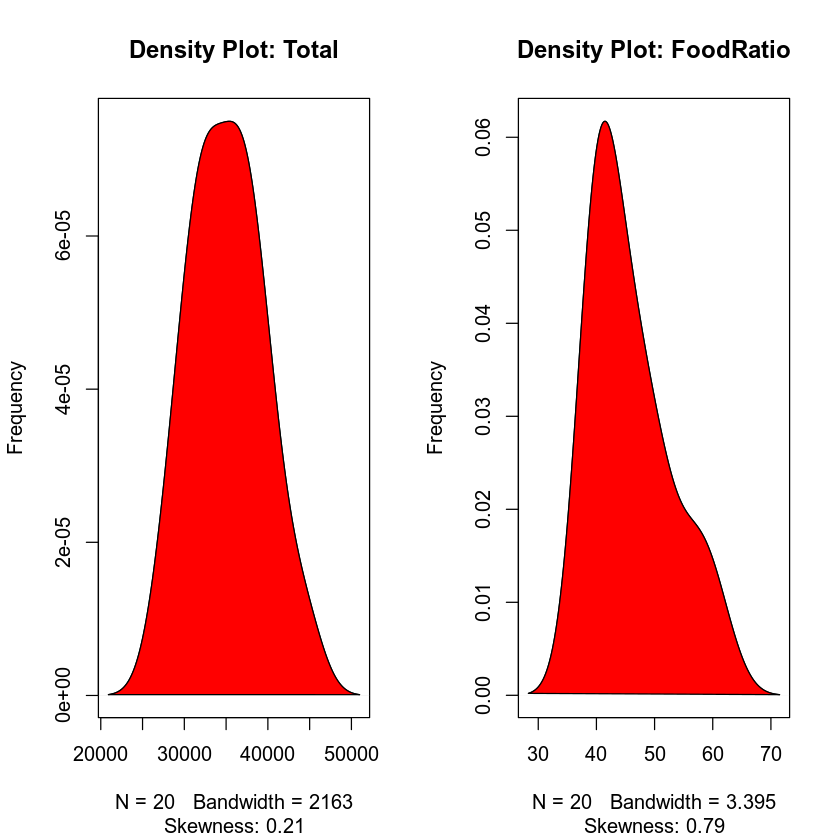

In [87]:
library(e1071)  # for skewness function
par(mfrow=c(1, 2)) 

plot(density(HouseholdModified$Total), main="Density Plot: Total", ylab="Frequency", sub=paste("Skewness:", round(e1071::skewness(HouseholdModified$Total), 2))) 

polygon(density(HouseholdModified$Total), col="red")

plot(density(HouseholdModified$FoodRatio), main="Density Plot: FoodRatio", ylab="Frequency", sub=paste("Skewness:", round(e1071::skewness(HouseholdModified$FoodRatio), 2))) 

polygon(density(HouseholdModified$FoodRatio), col="red")

In [88]:
cor(HouseholdModified$Total, HouseholdModified$FoodRatio)

[1] -0.7763434

Correlation coefficient between the 2 variables is -0.776 and newarly equal to -0.8. So we can conclude that there is a fairly strong negatve relationship between the *Total Expenditure* and *FoodRatio on Expenditure*

Next we will try to fit a regression line for the model

In [89]:
linearMod <- lm(Total ~ FoodRatio, data=HouseholdModified)  # build linear regression model on full data
print(linearMod)


Call:
lm(formula = FoodRatio ~ Total, data = HouseholdModified)

Coefficients:
(Intercept)        Total  
  88.366100    -0.001209  



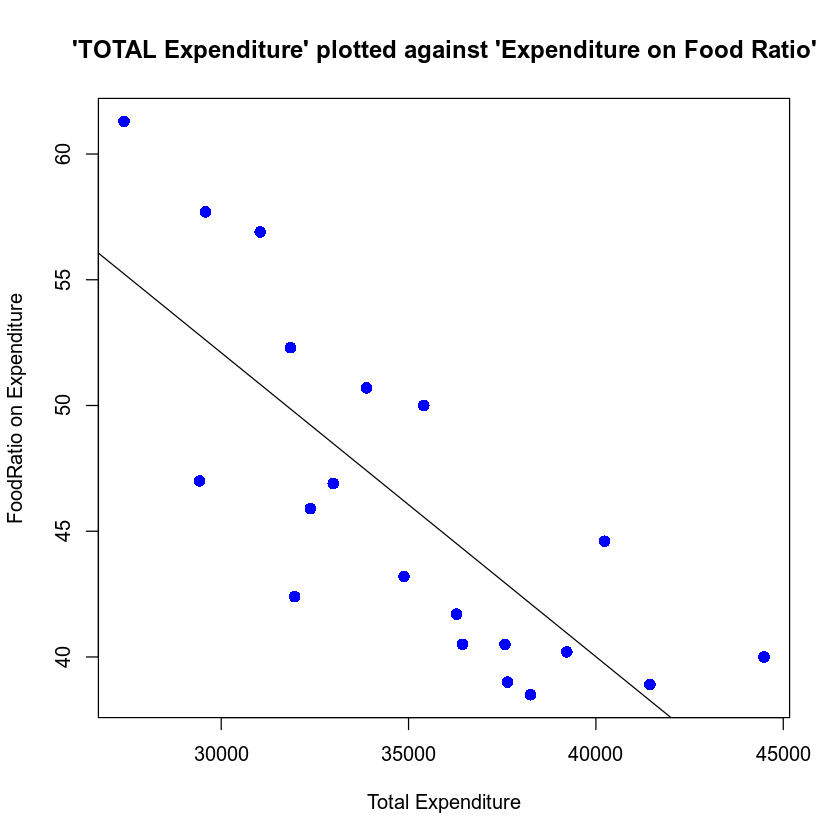

In [95]:
plot(HouseholdModified$Total, HouseholdModified$FoodRatio, pch = 16, cex = 1.3, col = "blue", main = "'TOTAL Expenditure' plotted against 'Expenditure on Food Ratio'", xlab = "Total Expenditure", ylab = "FoodRatio on Expenditure")

abline(linearMod)

## Conclusion

* There is a fairly strong negatve relationship between the *Total Expenditure* and *FoodRatio on Expenditure*
* Regression line equation in   *FoodRatio = -0.001209(Total) + 88.366100*
* Colombo, Gampaha and Kaluthara are the distrcts which has the highst average monthly expenditure in Sri Lanka
* Mullaitivu and Moneragala are the distrcts which has the lowest average monthly expenditure in Sri Lanka
